# Antes de empezar:
- git pull

Entorno de trabajo minimo:
- conda env create -f mllab.yml
- mllab.yml es un archivo que contiene el listado de paquetes para instalar
- fue generado con el comando:
conda env export > mllab.yml
- Ejecutar: source activate mllab

# Aplicaciones:
* Localización (Filtros de Histogramas) [Ver Notebook](./Localizacion.ipynb)
* Clasificacion (Naive Bayes) [Ver Notebook](./Naive_Bayes.ipynb)
    * Document classification
    * Detección de SPAM
    * Detectar autor

# Técnicas
* Filtros de histogramas (Histogram Filters)
* Naive Bayes

# Background teórico necesario
* Probabilidad conjunta, condicional, marginal
* Teorema de Bayes
* Función de masa de probabilidad y distribución de probabilidad
* Independencia
* Variables Aleatorias Gaussianas

# Herramientas
* Listas y diccionarios en **Python**
* Operaciones con arreglos en **Numpy**
* **Sklearn**: Vectorizers y NB
* Sparse matrices
* T-SNE

# Referencias:
- Localización: https://classroom.udacity.com/courses/cs373/lessons/48739381/concepts/487122860923
- Naive Bayes: https://classroom.udacity.com/courses/ud120/lessons/2254358555/concepts/30076485360923
- sklearn Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
- Numpy: https://docs.scipy.org/doc/numpy/index.html

# Ejemplo Dados:
D1 = Resultado de lanzar dado 1

D2 = Resultado de lanzar dado 2

S = D1 + D2

R = |D1 - D2|

S y R son variables aleatorias

In [42]:
import numpy as np
S = {}
R = {}
Conjunta = {}
EspacioMuestral = []
for d1 in range(1,7):
    for d2 in range(1,7):
        EspacioMuestral.append((d1,d2))
        suma = d1+d2
        resta = abs(d1 - d2)
        if suma not in S:
            S[suma] = 0
        if resta not in R:
            R[resta] = 0
        if (suma, resta) not in Conjunta:
            Conjunta[(suma, resta)] = 0
        S[suma] = S[suma] + 1
        R[resta] = R[resta] + 1
        Conjunta[(suma, resta)] = Conjunta[(suma, resta)] + 1

¿ $P(D1, D2) = P(D1) P(D2)$ ? por que?

### Importante: Por claridad no se dividio nada por 36. Para que sea formalemente correcto, todos los valores enteros de las V.A tienen que estar divididos por 36 

In [4]:
print('Espacio Muestral de d1 y d2:')
print(EspacioMuestral)
print()
print('V.A. S:')
print(S)
print()
print('V.A. R:')
print(R)

Espacio Muestral de d1 y d2:
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]

V.A. S:
{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

V.A. R:
{0: 6, 1: 10, 2: 8, 3: 6, 4: 4, 5: 2}


In [5]:
print('Dominio de S')
print(list(S.keys()))
print()
print('Dominio de R')
print(list(R.keys()))

Dominio de S
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Dominio de R
[0, 1, 2, 3, 4, 5]


## Marginales

In [6]:
from matplotlib import pyplot as plt

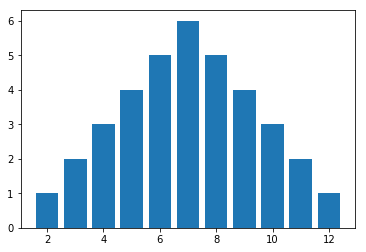

In [7]:
plt.bar(list(S.keys()), list(S.values()))
plt.show()

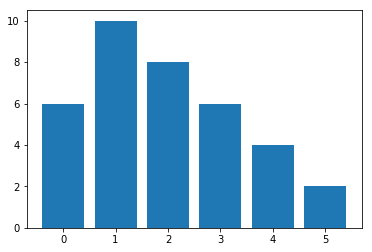

In [43]:
plt.bar(list(R.keys()), list(R.values()))
plt.show()

## Conjunta

In [44]:
# print(list(S.keys()))
print(' ', ','.join('{0:2.0f}'.format(e) for e in list(S.keys())))
#print('___________________________________')
for r in R.keys():
    l = []
    for s in S.keys():
        if (s,r) in Conjunta:
            l.append(Conjunta[(s,r)])
        else:
            l.append(0)
    print(r, l, np.array(l).sum())
print('___________________________________')
print(' ',list(S.values()))

   2, 3, 4, 5, 6, 7, 8, 9,10,11,12
0 [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1] 6
1 [0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0] 10
2 [0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0] 8
3 [0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0] 6
4 [0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0] 4
5 [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0] 2
___________________________________
  [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]


$P(S=3, R = 1)$ = ?

Cuales son los elementos?

## Condicionales

¿ $P(R,S) = P(R) P(S)$ ?

$P(R | S) = \large \frac{P(R, S)}{P(S)}$

Ejemplo

$P(R | S=7) = \large \frac{P(R, S=7)}{P(S=7)}$

In [183]:
Conjunta

{(2, 0): 1,
 (3, 1): 2,
 (4, 0): 1,
 (4, 2): 2,
 (5, 1): 2,
 (5, 3): 2,
 (6, 0): 1,
 (6, 2): 2,
 (6, 4): 2,
 (7, 1): 2,
 (7, 3): 2,
 (7, 5): 2,
 (8, 0): 1,
 (8, 2): 2,
 (8, 4): 2,
 (9, 1): 2,
 (9, 3): 2,
 (10, 0): 1,
 (10, 2): 2,
 (11, 1): 2,
 (12, 0): 1}

{2: 0.6666666666666666, 0: 0.3333333333333333}


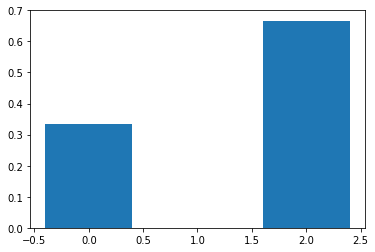

In [46]:
S0 = 4 # Condición
P_cond = {}
for k,v in Conjunta.items():
    if k[0]==S0:
        P_cond[k[1]] = (v/36)/(S[S0]/36)
print(P_cond)
plt.bar(list(P_cond.keys()), list(P_cond.values()))
plt.show()

## Likelihood

### Ejemplo Maximum Likelihood

Dado que observo que el modulo de la resta de los dos dados ($R$) es 1 y tengo que apostar por cuanto vale la suma, cual sería la mejor apuesta:  

$P(R = 1|S = k)$

In [185]:
R0 = 1
P_likelihood = {}
for k,v in Conjunta.items():
    if k[1]==R0:
        P_likelihood[k[0]] = (v/36)/(S[k[0]]/36)
P_likelihood

{3: 1.0, 5: 0.5, 7: 0.3333333333333333, 9: 0.5, 11: 1.0}

# Bayes

$ \large P(S=k|X) = \huge \frac{P(X|S=k)P(S=K)}{\sum_i{P(X|S_i)P(S_i)}}$

$\large Posteriori = \huge \frac{Likelihood \quad x \quad Priori}{Normalización}$